# K-Nearest neighborhood - KNN

- Small k의 갯수만큼 주변에 있는 sample들의 정보를 이용해서 새로운 관측치의 종속변수(y값)를 예측

### K는 어떻게 정하는가?
- 너무 큰 k
    - 미세한 경계부분을 잘못 분류할 것
    
    
- 너무 작은 k
    - 이상치의 영향을 크게 받을 것
    - 패턴이 직관적이지 않을 것
    
    
- Training error
    - k=1에서 가장 낮음.
    - 과적합의 가능성.
    

- Test error
    - 데이터에 따라 최적의 k가 존재.
    
    
- K의 결정
    - Test error를 작게하는 k.
    - Cross-validation 이용.
    - 작았다가 증가하는 지점이 있음.

### 종속변수
- 범주형 변수
    - k-nearest neighbors 중 가장 많이 나타나는 범주로 y를 추정.
    - Tie 문제를 막기 위해 k는 홀수로 정하는 것이 좋다.
        > 4개 범주가 나와 2개씩인 기준 중에 정해야 할 상황을 Tie라고 함.
    
    
- 연속형 변수
    - k-nearest neighbors의 대표값(평균)으로 y를 추정.
    - inverse distance weighted average 고려 가능.

### 거리는 어떻게 구할까?


### 설명 변수
- 범주형 변수
    - Hamming distance : 같은 범주인 것을 다 더하는 것.
        > '1011101'과 '1001001' 사이의 해밍거리는 2. 다른 것이 2개    
    
- J개의 연속형 변수, j = 1, 2, ... , J
    - Euclidian distance : 직선 거리
    - Manhattan distance : 바둑판 직선거리, 즉 골목골목가는 거리.

### Cross-Validation
- 1) 과적합 문제 해결
    - Training set을 가장 잘 맞히는 머신은 Test set에서는 잘 동작하지 않을 수 있다.
    - Training error를 과소추정하는 성향이 있음.
    - Test error를 구하려면, 데이터를 나누어야 하므로 데이터의 소실이 발생.
    - Error를 과소추정하지 않으면서 데이터의 소실을 최소화하려면?
        - 데이터를 나누어 번갈아 가며 Training과 Test Set 역할을 한다.
    
    
- 2) Sample_loss 해결

# 실습

In [3]:
from sklearn import neighbors, datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

- 모델 구축

In [5]:
clf = neighbors.KNeighborsClassifier(5) # k를 5로 줌.
clf.fit(X, y)

KNeighborsClassifier()

In [6]:
y_pred = clf.predict(X)

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]])

### Cross-validation을 활용한 최적의 k 찾기

In [10]:
from sklearn.model_selection import cross_val_score

- CV 진행

In [12]:
k_range = range(1,100) # CV 100개 해보기
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

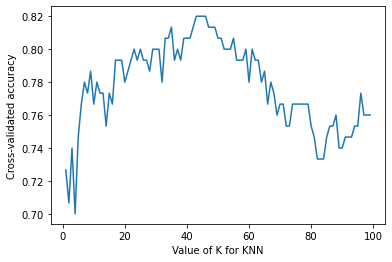

In [13]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

- k는 45 ~ 55 사이에서 좋은 정확도를 보임.

### 2. Weight를 준 KNN

- 똑같은 Neighbor 안에 있더라도 더 먼 것은 weight를 적게 주고해서 특정상황에서 KNN의 퍼포먼스를 높여줌.

<ipython-input-16-6e4cd6420b3f>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-16-6e4cd6420b3f>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


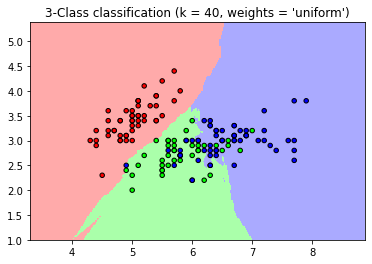

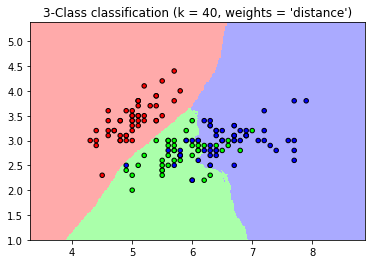

In [16]:
n_neighbors = 40

h = .02 # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X,y)
    
    # Plot the decision boundary, For that, we will assign a color to each
    # point in the mesh [x_min, x_max] x [y_min, y_max]
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
               edgecolor = 'k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" 
             % (n_neighbors, weights))
    
plt.show()


- distance 가 있는 경우가 더 보기 부드럽다.

In [17]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

In [18]:
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)

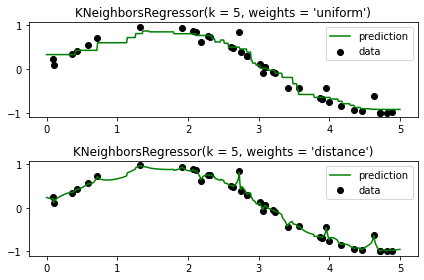

In [20]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)
    
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor(k = %i, weights = '%s')" % (n_neighbors, weights))
    
plt.tight_layout()
plt.show()

- uniform하게 준 경우 점들이 삐져나가지만,
- distance하게 준 경우 삐져나간 점들 또한 잡아놓는다.

- 이 모델이 distance에 적합하여 좋은 결과가 나온 것이지, 무조건적으로 distance가 좋은 것은 아니며, uniform이나 다른 방법을 통해서도 잘 Fitting이 되지 않을 시에 사용을 고려해보는 정도.